In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

x = np.arange(10).reshape(-1,1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

print(x)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]


In [4]:
print(y)

[0 0 0 0 1 1 1 1 1 1]


In [5]:
# Logistic Regression utilizes sigmoid function for classification
# Log-Likelihood function is used for  MLE (Maximum Likelihood Estimation)

model = LogisticRegression(solver='liblinear', random_state=0).fit(x,y)
# random_state defines what Pseudo Random Number Generator - PRNG to use
# liblinear is used for handling high dimensional data
# liblinear developed at National Taiwan University was the winner of ICML 2018 challenge
# for using elasticnet, you need to use the saga solver

In [6]:
model.classes_

array([0, 1])

In [7]:
# intercept, b-0
model.intercept_

array([-1.04608067])

In [8]:
# b-1
model.coef_

array([[0.51491375]])

In [10]:
model.predict_proba(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In [11]:
model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [12]:
model.score(x,y)

0.9

In [13]:
confusion_matrix(y, model.predict(x))

array([[3, 1],
       [0, 6]])

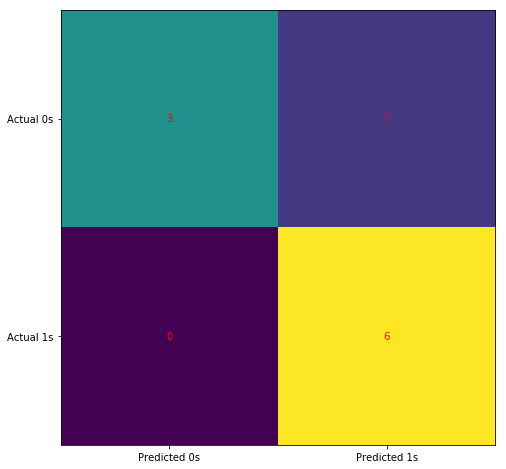

In [14]:
# Visualize the confusion matrix

cm = confusion_matrix(y, model.predict(x))
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [15]:
print(classification_report(y,model.predict(x)))

             precision    recall  f1-score   support

          0       1.00      0.75      0.86         4
          1       0.86      1.00      0.92         6

avg / total       0.91      0.90      0.90        10



In [19]:
# change regularization strength to reduce overfitting
model = LogisticRegression(solver='liblinear',C=10.0,random_state=0).fit(x,y)

In [20]:
model.intercept_

array([-3.51335372])

In [21]:
model.coef_

array([[1.12066084]])

In [22]:
model.predict_proba(x)

array([[0.97106534, 0.02893466],
       [0.9162684 , 0.0837316 ],
       [0.7810904 , 0.2189096 ],
       [0.53777071, 0.46222929],
       [0.27502212, 0.72497788],
       [0.11007743, 0.88992257],
       [0.03876835, 0.96123165],
       [0.01298011, 0.98701989],
       [0.0042697 , 0.9957303 ],
       [0.00139621, 0.99860379]])

In [23]:
model.predict(x)

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [24]:
model.score(x,y)

1.0

In [25]:
confusion_matrix(y,model.predict(x))

array([[4, 0],
       [0, 6]])

In [26]:
print(classification_report(y,model.predict(x)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         4
          1       1.00      1.00      1.00         6

avg / total       1.00      1.00      1.00        10

